In [1]:
import ast
import pandas as pd

Wczytanie danych

In [2]:
summaries = pd.read_csv('../cleaned_datasets/news_summaries.csv', sep='\t', encoding='utf-8')
summaries['summary_clean_tokens'] = summaries['summary_clean_tokens'].apply(ast.literal_eval)
summaries = summaries.dropna(how="any", axis=0)
summaries['label'] = summaries['label'].apply(lambda label: label - 1)
summaries

,label,summary,length,summary_clean_tokens,summary_clean
0,0,TimeWarner said fourth quarter sales rose 2% t...,901,"[timewarn, said, fourth, quarter, sale, rose, ...",timewarn said fourth quarter sale rose fullyea...
1,0,The dollar has hit its highest level against t...,938,"[dollar, hit, highest, level, euro, almost, th...",dollar hit highest level euro almost three mon...
2,0,Yukos' owner Menatep Group says it will ask Ro...,690,"[yuko, owner, menatep, group, say, ask, rosnef...",yuko owner menatep group say ask rosneft repay...
3,0,"Rod Eddington, BA's chief executive, said the ...",1208,"[rod, eddington, bas, chief, execut, said, res...",rod eddington bas chief execut said result res...
4,0,Pernod has reduced the debt it took on to fund...,629,"[pernod, reduc, debt, took, fund, seagram, pur...",pernod reduc debt took fund seagram purchas eu...
...,...,...,...,...,...
2220,4,BT is introducing two initiatives to help beat...,1174,"[bt, introduc, two, initi, help, beat, rogu, d...",bt introduc two initi help beat rogu dialler s...
2221,4,A third of them read unsolicited junk e-mail a...,805,"[third, read, unsolicit, junk, email, buy, goo...",third read unsolicit junk email buy good servi...
2222,4,This goes to the heart of the European project...,2971,"[goe, heart, european, project, even, softwar,...",goe heart european project even softwar patent...
2223,4,Amit Yoran was director of the National Cyber ...,890,"[yoran, director, nation, cyber, secur, divis,...",yoran director nation cyber secur divis within...


Wizualizacja tokenów

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

Biznes

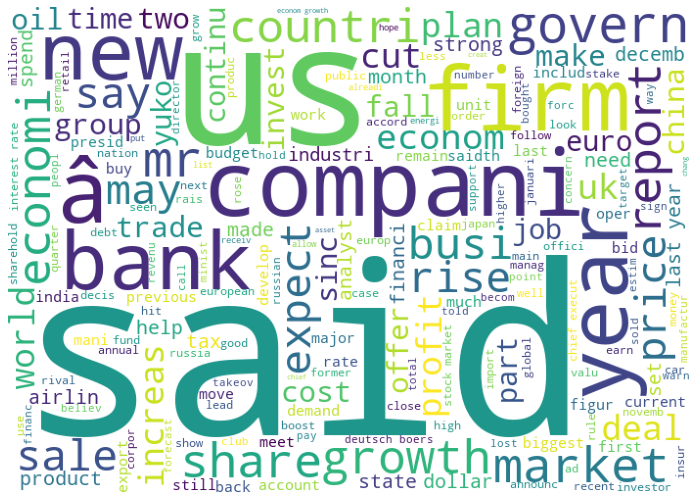

In [4]:
one_star_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
one_star_word_cloud.generate(' '.join(text for text in summaries.loc[summaries['label'] == 0, 'summary_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(one_star_word_cloud)
plt.show()

Rozrywka

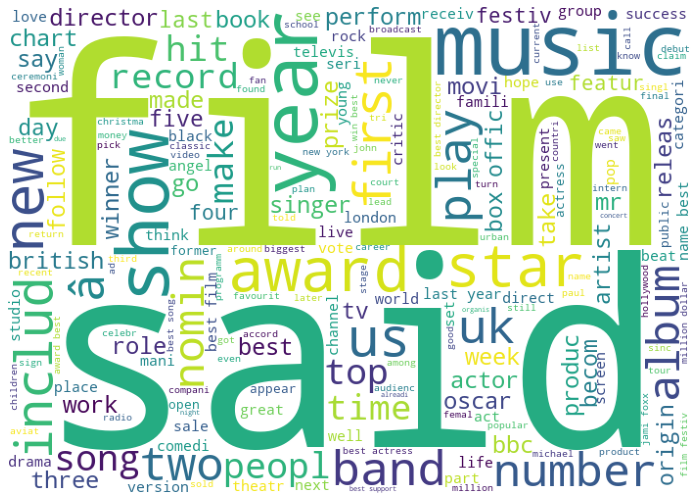

In [5]:
entertainment_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
entertainment_word_cloud.generate(' '.join(text for text in summaries.loc[summaries['label'] == 1, 'summary_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(entertainment_word_cloud)
plt.show()

Polityka

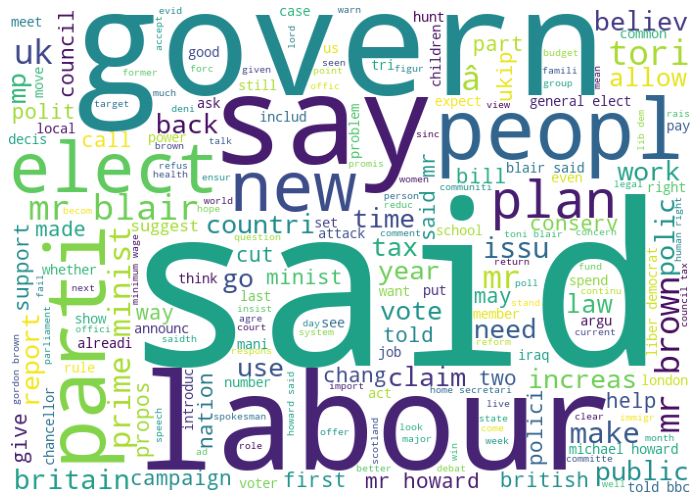

In [6]:
politics_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
politics_word_cloud.generate(' '.join(text for text in summaries.loc[summaries['label'] == 2, 'summary_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(politics_word_cloud)
plt.show()

Sport

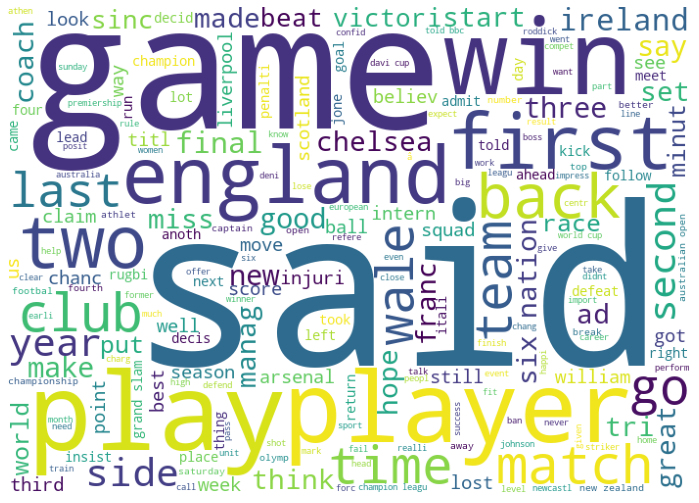

In [7]:
sport_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
sport_word_cloud.generate(' '.join(text for text in summaries.loc[summaries['label'] == 3, 'summary_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(sport_word_cloud)
plt.show()

Technologia

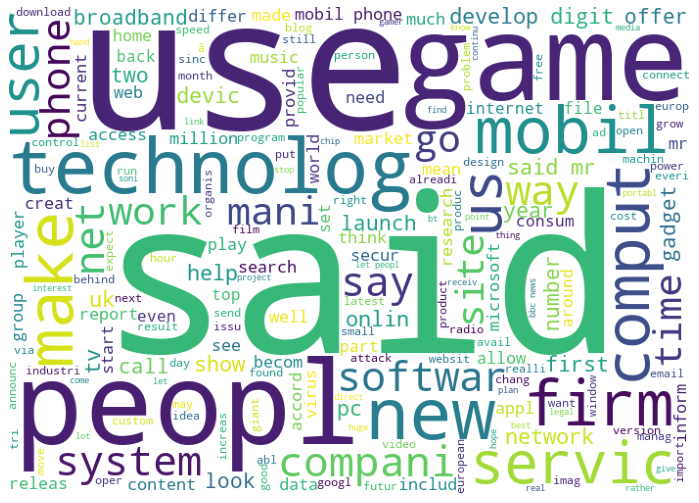

In [8]:
tech_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
tech_word_cloud.generate(' '.join(text for text in summaries.loc[summaries['label'] == 4, 'summary_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(tech_word_cloud)
plt.show()

Wektoryzacja

In [9]:
x = summaries['summary_clean']
y = summaries['label']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=1337)

count_vectorizer = CountVectorizer(
	stop_words='english',
	ngram_range=(1, 2),
	max_features=100
)

x_train_count_matrix = count_vectorizer.fit_transform(x_train)
x_test_count_matrix = count_vectorizer.transform(x_test)

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

x_train_tfidf = tfidf_transformer.fit_transform(x_train_count_matrix)
x_test_tfidf = tfidf_transformer.transform(x_test_count_matrix)

Modelowanie

In [12]:
# multinomial bayes

from sklearn.naive_bayes import MultinomialNB
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train_tfidf, y_train)
y_pred_class = multinomial_nb.predict(x_test_tfidf)
y_pred_prob = multinomial_nb.predict_proba(x_test_count_matrix)[:, 1]

In [13]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

0.8359550561797753


array([[87,  0,  6,  2,  7],
       [ 5, 58,  3,  9,  2],
       [ 5,  0, 74,  5,  0],
       [ 6,  4,  1, 91,  0],
       [ 4,  0,  2, 12, 62]], dtype=int64)

In [14]:
# svm
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train_tfidf, y_train)
y_pred_class = svm.predict(x_test_tfidf)
print(metrics.accuracy_score(y_test, y_pred_class))

0.8539325842696629


In [15]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[88,  2,  3,  3,  6],
       [ 5, 62,  1,  7,  2],
       [ 7,  0, 72,  4,  1],
       [ 4,  4,  1, 93,  0],
       [ 4,  1,  2,  8, 65]], dtype=int64)

In [16]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_tfidf, y_train)
y_pred_class = knn.predict(x_test_tfidf)
print(metrics.accuracy_score(y_test, y_pred_class))

0.7707865168539326


Tokenizacja lstm

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(summaries['summary_clean'])
total_words = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(summaries['summary_clean'])
max_sequence_len = min(max(len(seq) for seq in sequences), 100)
padded_sequences = pad_sequences(
	sequences,
	max_sequence_len,
	padding='pre'
)
x_lstm = padded_sequences
y_lstm = summaries['label']
x_lstm_train, x_lstm_test, y_lstm_train, y_lstm_test = train_test_split(x_lstm, y_lstm, train_size=0.8, stratify=y_lstm, random_state=1337)

In [19]:
from keras import Sequential
from keras import layers
# lstm
model = Sequential()
model.add(layers.Embedding(input_dim=total_words, output_dim=64, input_length=max_sequence_len))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(100))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.fit(
    x_lstm_train,
    y_lstm_train,
    epochs = 5,
    batch_size = 16,
	validation_data = (x_lstm_test, y_lstm_test),
)

Epoch 1/5
112/112 [==============================] - 8s 52ms/step - loss: 1.3896 - accuracy: 0.4185 - val_loss: 1.4551 - val_accuracy: 0.3640
Epoch 2/5
112/112 [==============================] - 5s 47ms/step - loss: 0.4909 - accuracy: 0.8472 - val_loss: 0.9736 - val_accuracy: 0.6067
Epoch 3/5
112/112 [==============================] - 5s 46ms/step - loss: 0.2035 - accuracy: 0.9517 - val_loss: 0.5749 - val_accuracy: 0.8539
Epoch 4/5
112/112 [==============================] - 5s 48ms/step - loss: 0.0589 - accuracy: 0.9882 - val_loss: 0.3891 - val_accuracy: 0.9079
Epoch 5/5
112/112 [==============================] - 5s 45ms/step - loss: 0.0575 - accuracy: 0.9899 - val_loss: 0.4521 - val_accuracy: 0.8944


In [21]:
model.save('bbs_summary_news_model.h5')